# Question

- There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [2]:
# Load the data

car_used = pd.read_csv(r"C:\Users\Admin\Desktop\used_cars_data.csv")

car_used

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [3]:
# To check the first 10 rows of the data

car_used.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95


In [4]:
# To check any 5 rows randomly in the data

car_used.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4499,4499,Toyota Fortuner 3.0 Diesel,Hyderabad,2010,193254,Diesel,Manual,First,11.5 kmpl,2982 CC,171 bhp,7.0,37.17,12.99
365,365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59,35.00
5764,5764,Maruti Alto K10 2010-2014 VXI,Hyderabad,2011,78000,Petrol,Manual,Second,20.92 kmpl,998 CC,67.1 bhp,5.0,4.36,2.30
2715,2715,Maruti Swift AMT DDiS VDI,Chennai,2018,11000,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88,8.00
4378,4378,Hyundai Xcent 1.1 CRDi S,Mumbai,2016,29000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,8.23,5.95


In [5]:
# To check the dimension of the data

car_used.shape

(7253, 14)

- There are 7253 rows and 14 columns in the data

In [6]:
# To check the data types

car_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- There are 8 categorical and 6 numerical variables in the data
- The data occpies 793KB memory space
- There are missing values in the data

In [7]:
# To check the describe statistics

car_used.describe(include="all")

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7078,7200.000000,7253.000000,6019.000000
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,385,NaN,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN,NaN
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,NaN,NaN
mean,3626.000000,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,21.307322,9.479468
std,2093.905084,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,24.256314,11.187917
min,0.000000,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.910000,0.440000
25%,1813.000000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.880000,3.500000
50%,3626.000000,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,11.300000,5.640000
75%,5439.000000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,21.690000,9.950000


**Obseervation**

- The top location in the data is Munbai and there are 11 unique locations 
- The top  brand and model name is Mahindra XUV500 W82WD 
- The New_Price varies from 3.91 to 375 dollars
- The Price varies from 0.44 to 160 dollars
- The transmission power has 2 unique number but manual is the most frequent
- The fuel_type has 5 unique fuels but diesel is the top

In [8]:
# To create a copy of the data

car = car_used.copy()

In [9]:
# To check for duplication

car.duplicated().sum()

0

- There is no missing values in the data

In [10]:
# To check the missing values in the data

car.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- There are missing values in the data

### Filling the missing values in the target

In [11]:
# To check the missing value in the target alone

car["Price"].isna().sum()

1234

- There are 1,234 missing values in the target variable alone

# Strategy

- Filling the missing values of 1,234 with the computation (mean or median) will make the data unreliable and questions the
efficiency of our model's performances. Hence the missing values in the target will be dropped

In [12]:
# To drop the missing values in the target variable "Price"

car.dropna(subset=["Price"], inplace =True)

In [13]:
# To reset the index after dropping the missing values in the data

car.reset_index(drop =True, inplace=True)

In [14]:
# To check the missing values in the rest of the data

car.isna().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

### Filling the missing value in the "Power" variable

In [15]:
# To confirm the missing values in the Power

car["Power"].isnull().sum()

143

- There are 143 missing values in the power

In [16]:
# In dealing with missing values in "Power", check the unique values

car.Power.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', nan,
       '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp',
       '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp',
       '67 bhp', '241.4 bhp', '35 bhp',

In [17]:
# To seperate and strip the unit "bhp" from the numbers

car["Power"] = car["Power"].str.strip("bhp").str.strip(" ")

In [18]:
# To check the unique values of Power again after stripping "bhp"

car["Power"].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', nan, '132', '86.7',
       '73.94', '117.3', '218', '168.5', '89.84', '110', '90', '82.85',
       '67', '241.4', '35', '270.9', '126.32', '73', '130', '100.6',
       '150', '75.94', '215', '107.3', '37.48', '120', '178', '152',
       '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171', '76.8',
       '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86', '112',
       '88.73', '57.6', '157.75', '102.5', '201.1', '83.1', '68.05',
   

In [19]:
# To check the data type of the Power variable

car["Power"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6019 entries, 0 to 6018
Series name: Power
Non-Null Count  Dtype 
--------------  ----- 
5876 non-null   object
dtypes: object(1)
memory usage: 47.1+ KB


 **Observation**
- The data type is object (categorical). There is need to convert to floats (numeric) this variable is now numeric after stripping "bhp"

In [20]:
# To convert the data type of power to float

car["Power"] = car["Power"].astype("float64")

In [21]:
# To check the descriptive statistics of the Power

car["Power"].describe()

count    5876.000000
mean      113.253050
std        53.874957
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

**Strategy**

- Since the difference between the maximum (560) and the least (113) is high from the descriptive statistics, the median of this variable will be adopted to compute the 143 missing values

In [22]:
# To compute the missing value in the Power using the median

car["Power"].fillna(value=car["Power"].median(), inplace=True)

In [23]:
# To check the missing values again in the data

car.isna().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                42
New_Price             0
Price                 0
dtype: int64

## Data Preprocessing...


### To compute the missing values in the Engine

In [24]:
# To check the unique value

car["Engine"].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [25]:
# To strip the unit "CC" 

car["Engine"] = car["Engine"].str.strip("CC").str.strip(" ")

In [26]:
# To convert the data type of Engine to numerical after stripping the unit "CC"

car["Engine"] = car["Engine"].astype("float64")

In [27]:
# To check the descriptive statistics of Engine

car["Engine"].describe()

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

- The least is 72 while the highest is 5,998. Because of the outliers, their median will used to compute the 42 missing values

In [28]:
car["Engine"].fillna(value=car["Engine"].median(), inplace=True)

In [29]:
# To check the missing values again in the data

car.isna().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                42
New_Price             0
Price                 0
dtype: int64

### To compute the 2 missing values of the mileage

In [30]:
# To check the unique value of the mileage

car["Mileage"].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [31]:
# To seperate the unit from the numbers

car["Mileage"] = car["Mileage"].str.strip("km/kg").str.strip("kmpl").str.strip(" ")

In [32]:
# To convert the "object" data type to float after stripping the unit

car["Mileage"] = car["Mileage"].astype("float64")

In [33]:
# To check the mileage descriptive statistics

car["Mileage"].describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

- The least is zero, the highest is 34 while the median is 18. Their median will be calculated and adopted in filling the 2 missing values.

In [34]:
# To compute the missing value

car["Mileage"].fillna(value =car["Mileage"].median(), inplace =True)

In [35]:
# To check the missing values in the data

car.isna().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
New_Price             0
Price                 0
dtype: int64

### To compute the missing values in the "Seats"

In [36]:
# To find the unique value

car["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [37]:
# To see the descriptive statistics

car["Seats"].describe()

count    5977.000000
mean        5.278735
std         0.808840
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [38]:
# To fill the missing value with the median

car["Seats"].fillna(value =car["Seats"].median(), inplace =True)

In [39]:
# To check the missing values again 

car.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

- There are zero missing values in the data

## Visualisation


- Univariates

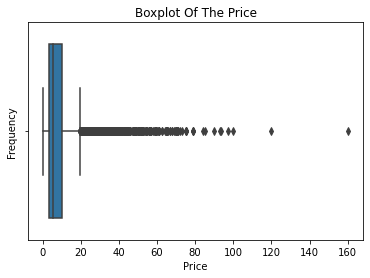

In [40]:
# Box plot to visually view target variable

sns.boxplot(data = car, x = "Price");
plt.title("Boxplot Of The Price")
plt.xlabel("Price")
plt.ylabel("Frequency");

- There are high prices of the used cars in the data, as high as 160 when the median is less than 7
- The distribution is right skewed because of these high prices

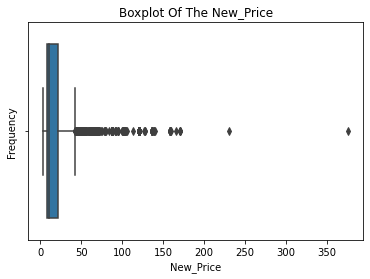

In [41]:
# Box plot to visually view New_price variable

sns.boxplot(data = car, x = "New_Price");
plt.title("Boxplot Of The New_Price")
plt.xlabel("New_Price")
plt.ylabel("Frequency");

- There are high prices of the new cars in the data
- The distribution is right skewed because of these high prices

## Bivariate plots

In [42]:
# To the correlation between the target and other variables

car_mat = car.corr()

car_mat

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,1.000000,0.002354,-0.008734,0.023674,-0.004117,-0.012064,-0.010727,-0.013431,-0.020275
Year,0.002354,1.000000,-0.173048,0.321534,-0.050086,0.024195,0.015204,-0.007432,0.305327
Kilometers_Driven,-0.008734,-0.173048,1.000000,-0.065253,0.090890,0.032080,0.082782,0.016720,-0.011493
Mileage,0.023674,0.321534,-0.065253,1.000000,-0.586404,-0.497666,-0.299632,-0.415006,-0.306588
Engine,-0.004117,-0.050086,0.090890,-0.586404,1.000000,0.860410,0.393368,0.697517,0.657347
Power,-0.012064,0.024195,0.032080,-0.497666,0.860410,1.000000,0.102470,0.791913,0.769711
Seats,-0.010727,0.015204,0.082782,-0.299632,0.393368,0.102470,1.000000,0.038492,0.052811
New_Price,-0.013431,-0.007432,0.016720,-0.415006,0.697517,0.791913,0.038492,1.000000,0.763362
Price,-0.020275,0.305327,-0.011493,-0.306588,0.657347,0.769711,0.052811,0.763362,1.000000


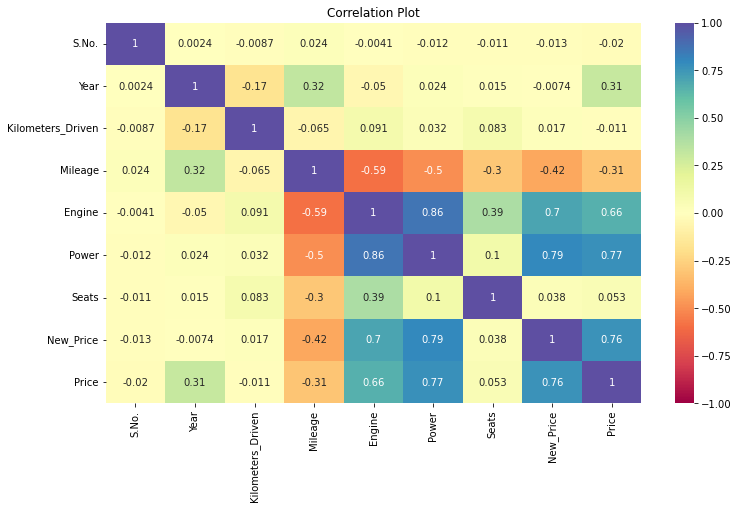

In [43]:
# Heatmap to show relationships among the variables

plt.figure(figsize=(12,7))
sns.heatmap(data =car_mat, annot= True, vmin= -1, vmax=1, cmap= "Spectral");
plt.title("Correlation Plot")
plt.show();

# Points noted from the correlation plot

- The target "price" and the maximum Power of the engine have the highest positive correlation of 0.77.
- The displacement volume of the engine age and the price have positive correlation of 0.66. 
- The number of the seats in the car and the price have correlation at 0.053
- The New_price (the price of the new car) has correlation with the price of the used car (target) at 0.76. 
- The manufacturing year of the car has positive correlation at 0.31 with the price.
- The mileage of the car has negative correlation with the target at -0.31
- The kilometers_driven is at negative correlation of -0.011 with the target.

### Interpretation

- For any two variables with positive correlation, one increases as the other increases.


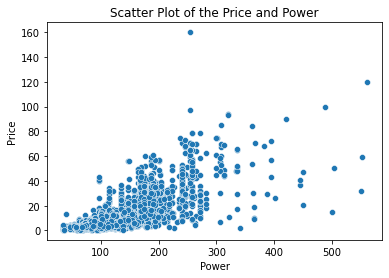

In [44]:
# scatter plot to visually view relationships between the target "Price" and Power variable

sns.scatterplot(data= car, y ="Price", x = "Power");
plt.title("Scatter Plot of the Price and Power")
plt.ylabel("Price")
plt.xlabel("Power")
plt.show();

**Observations**

- The Power shows correlation with the price; as the price rises, so the power increases.
- The highest price of the used cars of 160 has a power of 250
- The highest power of 560 has three prices, this shows that power is NOT the only determinant of the price of the used cars

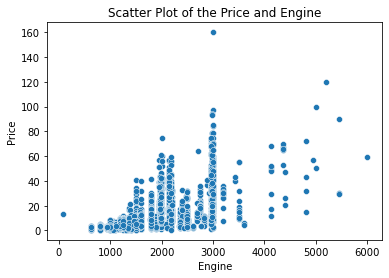

In [45]:
# scatter plot to visually view relationships between the target "Price" and Engine variable

sns.scatterplot(data= car, y ="Price", x = "Engine");
plt.title("Scatter Plot of the Price and Engine")
plt.ylabel("Price")
plt.xlabel("Engine")
plt.show();

**Observations**

- The highest price has engine of 3000
- The highest of 6000 has a price of 60
- Engine shows positive correlation with the price

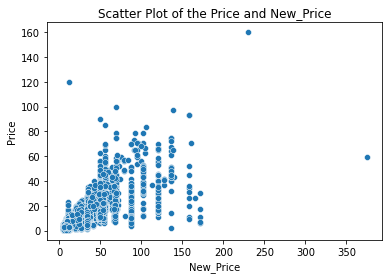

In [46]:
# scatter plot to visually view relationships between the target "Price" and New_Price variable

sns.scatterplot(data= car, y ="Price", x = "New_Price");
plt.title("Scatter Plot of the Price and New_Price")
plt.ylabel("Price")
plt.xlabel("New_Price")
plt.show();

**Observations**

- The highest price of the used cars of 160 has the nw_price of 225 
- The highest New_price of 350 has a price of 60


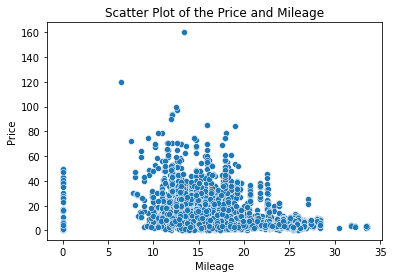

In [47]:
# scatter plot to visually view relationships between the target "Price" and Mileage variable

sns.scatterplot(data= car, y="Price", x = "Mileage");
plt.title("Scatter Plot of the Price and Mileage")
plt.ylabel("Price")
plt.xlabel("Mileage")
plt.show();

**Observations** 

- The highest mileage of 33 has a price of 0
- the higest price of 160 has a mileage  of 15.
- The mileage shows a negative correlation with the price, as one increases, the other decreases.

## To build the model

In [48]:
# To check the data types

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 658.5+ KB


**Strategy**

- Categorical variables in the data (Name, location, Fuel_type, Transmission and Owner_type) will not contribute much to the 
building of the model. Using get_dummies method to expand them in the data will only increase the compexity of the model 
unnecessary, hence these variables will be dropped.

In [49]:
# To drop the categorical variables

cars = car.drop(["Name","Location","Fuel_Type","Transmission", "Owner_Type"], axis =1)


In [50]:
# To check the remaining variables 

cars.shape

(6019, 9)

- There are 6019 rows and 9 columns in the data

In [51]:
# To seperate the target from the independent variables and given target new variable name, y

X = cars.drop("Price", axis =1)

y = cars["Price"]

In [52]:
# To split data into 80% for training data and 20% for testing data

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [53]:
# To check the dimension of the target training data

x_train.shape

(4815, 8)

- There are 4815 rows and 8 columns in the training data

In [54]:
# To check the dimension of the target testing data

x_test.shape

(1204, 8)

- There are 1204 rows and 8 columns in the testing data

In [55]:
# To create an instant of the scaler

scaler = StandardScaler()

# For scaler to calculate and convert each variable to have a mean and standard deviation of 0 and 1, and save it in a new name
    
x_train_scaler = scaler.fit_transform(x_train)


x_test_scaler = scaler.transform(x_test)

In [56]:
# To instantiate linear regression

lr = LinearRegression()

# To build the model

lr.fit(x_train_scaler, y_train)

LinearRegression()

In [57]:
# To know the values of the coefficients

lr.coef_

array([-0.11664212,  3.53377907,  0.26833653, -0.21604759,  0.99400277,
        3.73223859, -0.61520729,  4.89876193])

In [58]:
# To iterate through the coefficients in order to know the coefficent of each independent variable

for idx, col_name in enumerate(X.columns):           
    print(f"{col_name} has coefficient of {lr.coef_[idx]}")

S.No. has coefficient of -0.11664211938952959
Year has coefficient of 3.5337790667075923
Kilometers_Driven has coefficient of 0.2683365296553363
Mileage has coefficient of -0.21604758815561212
Engine has coefficient of 0.9940027687323535
Power has coefficient of 3.732238590766217
Seats has coefficient of -0.6152072940128536
New_Price has coefficient of 4.89876192998365


**Interpretation of the coefficients**

- The New_price has the highest positive coefficient of 4.9 which means for every unit increase in the New_price variable
will cause an increase of 4.9% in the target variable "Price".
- The seats has the most negative coefficient of -0.6 which menas for every unit increase in the seats variable will cause a 
decrease of 0.6% in the dependent variable "Price".

In [59]:
# function to compute different metrics to check performance of a regression model

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

# predicting using the independent variables

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

# creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### To check the linear regression model training performance

In [60]:
# To know the performance of the train data

df_train = model_performance_regression(lr, x_train_scaler, y_train)

df_train

,RMSE,MAE,R-squared,Adj. R-squared
0,5.638953,3.205604,0.748543,0.748124


**The train data has...**

- Root mean squared error of 5.64
- Mean absolute error of 3.2
- R-squared of 0.748
- Adjusted R-squared of 0.748

## Interpretation
- The R-squared of 75% means that 75% variation of the dependent variable "Price" is explained by the independent variables


### To check the linear regression model testing performance

In [61]:
# To know the performance of the test data

df_test = model_performance_regression(lr, x_test_scaler, y_test)

df_test

,RMSE,MAE,R-squared,Adj. R-squared
0,5.627674,3.180633,0.735811,0.734042


**The test data has...**

- Root mean squared error of 5.6
- Mean absolute error of 3.2
- R-squared of 0.736
- Adjusted R-squared of 0.73.4

**Interpretation**

- The R-squared of 74% means that 74% variation of the dependent variable "Price" is explained by the independent variables.

## Conclusion
- The regression model under-fits.
This means that the model did not perform well on the training and on the testing data because 74% performance is too low

### Using ridge regression to improve the model....

In [62]:
# from the library, import the ridge algorithm

from sklearn.linear_model import Ridge

# instantiate the model and set the regularisation strenghth of alpha to 0.05

ridge = Ridge(alpha = 0.8, random_state = 0)

# To train the model

ridge.fit(x_train_scaler, y_train)

Ridge(alpha=0.8, random_state=0)

### To check the ridge regression model training performance

In [63]:
# To check the ridge model's training performance

df_train2 = model_performance_regression(ridge, x_train_scaler, y_train)

df_train

,RMSE,MAE,R-squared,Adj. R-squared
0,5.638953,3.205604,0.748543,0.748124


**From above**

- The R-squared is 75%
- The adjusted R-squared is also 75%

### Interpretation

The R-squared of 75% means that 75% variation of the dependent variable "Price" is explained by the independent variables.

#### When compared with linear regression model's training performance

- The performance remains the same as linear regression model in the training performance

### To check the ridge regression model's testing performance

In [64]:
# To check the ridge model's testing performance

df_test2 = model_performance_regression(ridge, x_test_scaler, y_test)

df_test2

,RMSE,MAE,R-squared,Adj. R-squared
0,5.627557,3.180485,0.735822,0.734053


**From above**

- The R-squared is 74%
- The adjusted R-squared is also 74%

### Interpretation

The R-squared of 74% means that 74% variation of the dependent variable "Price" is explained by the independent variables.

### When compared with linear regression model's testing performance

- There is no difference in the testing performance of ridge regression model when compared with the linear regression model. The R-squared and the Adjusted R-squared are exactly the same.

## Using lasso to improve the model....

In [65]:
# from the library, import the lasso algorithm

from sklearn.linear_model import Lasso

# To create an instant of lasso regression and set the regularisation strenghth of alpha to 0.8

lasso = Lasso(alpha = 0.8, random_state = 0)

# To build lasso model

lasso.fit(x_train_scaler, y_train)

Lasso(alpha=0.8, random_state=0)

### To check the lasso regression model's training performance¶

In [66]:
# To check the lasso model's training performance

df_train3 = model_performance_regression(lasso, x_train_scaler, y_train)

df_train3

,RMSE,MAE,R-squared,Adj. R-squared
0,5.786343,3.038222,0.735226,0.734785


**From above**

- The R-squared is 74%
- The adjusted R-squared is also 74%

### Interpretation

The R-squared of 74% means that 74% variation of the dependent variable "Price" is explained by the independent variables.

### When compared with linear regression & ridge models' training performances

- The performance decreases to 74% from 75% as in linear regression and ridge regression models in the training performances. 


## To check the lasso regression model's testing performance

In [67]:
# To check the lasso model's testing performance

df_test3 = model_performance_regression(lasso, x_test_scaler, y_test)

df_test3

,RMSE,MAE,R-squared,Adj. R-squared
0,5.572336,2.960928,0.740981,0.739247


**From above**

- The R-squared is 74%
- The adjusted R-squared is also 74%

### Interpretation

- The R-squared of 74% means that 74% variation of the dependent variable "Price" is explained by the independent variables.

###  When compared with linear regression & ridge models' testing performances

- The model's testin gperformance in R-squared increased to 74% from 73.5% in both linear and ridge regression models and to 73.9%
in Adjusted R-Squared from 73.4% in both linear and ridge regression models.